In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Hotels_data_Changed.csv")
df.head()

,Unnamed: 0,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars,DayDiff,WeekDay,DiscountDiff,DiscountPerc
0,0,1,7/17/2015 0:00,8/12/2015 0:00,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3,26,Wednesday,138,88.285229
1,1,1,7/17/2015 0:00,8/19/2015 0:00,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3,33,Wednesday,131,88.230009
2,2,1,7/17/2015 0:00,8/13/2015 0:00,5,4370,4240,1,3,The Peninsula New York,5,27,Thursday,130,97.025172
3,3,1,7/17/2015 0:00,7/26/2015 0:00,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4,9,Sunday,72,95.859689
4,4,1,7/17/2015 0:00,8/12/2015 0:00,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4,26,Wednesday,67,96.147211


In [3]:
DayDiff = pd.read_csv('DayDiff.csv')
DayDiff.head()

,Unnamed: 0,Snapshot Date,Checkin Date,WeekDay
0,0,7/17/2015,8/12/2015,2
1,1,7/17/2015,8/19/2015,2
2,2,7/17/2015,8/13/2015,3
3,3,7/17/2015,7/26/2015,6
4,4,7/17/2015,8/12/2015,2


In [4]:
DayDiff['Snapshot Date'] = pd.to_datetime(df['Snapshot Date'])    
DayDiff['Snapshot_date_delta'] = (DayDiff['Snapshot Date'] - DayDiff['Snapshot Date'].min())  / np.timedelta64(1,'D')
DayDiff['Checkin Date'] = pd.to_datetime(df['Checkin Date'])    
DayDiff['Checkin_date_delta'] = (DayDiff['Checkin Date'] - DayDiff['Checkin Date'].min())  / np.timedelta64(1,'D')
DayDiff.head()

,Unnamed: 0,Snapshot Date,Checkin Date,WeekDay,Snapshot_date_delta,Checkin_date_delta
0,0,2015-07-17,2015-08-12,2,0.0,25.0
1,1,2015-07-17,2015-08-19,2,0.0,32.0
2,2,2015-07-17,2015-08-13,3,0.0,26.0
3,3,2015-07-17,2015-07-26,6,0.0,8.0
4,4,2015-07-17,2015-08-12,2,0.0,25.0


In [53]:
for index, row in DayDiff.iterrows():
    time = DayDiff['Snapshot Date'][index]
    time = 10000*time.year + 100*time.month + time.day
    DayDiff.at[index, 'SnapshotDate'] = time 
DayDiff.head()

,Unnamed: 0,Snapshot Date,Checkin Date,WeekDay,Snapshot_date_delta,Checkin_date_delta,Snapshot Date a,SnapshotDate
0,0,2015-07-17,2015-08-12,2,0.0,25.0,NaN,20150717.0
1,1,2015-07-17,2015-08-19,2,0.0,32.0,NaN,20150717.0
2,2,2015-07-17,2015-08-13,3,0.0,26.0,NaN,20150717.0
3,3,2015-07-17,2015-07-26,6,0.0,8.0,NaN,20150717.0
4,4,2015-07-17,2015-08-12,2,0.0,25.0,NaN,20150717.0


In [5]:
df["Hotel Name cat"] = df["Hotel Name"].astype('category')
df.dtypes

Unnamed: 0            int64
Snapshot ID           int64
Snapshot Date        object
Checkin Date         object
Days                  int64
Original Price        int64
Discount Price        int64
Discount Code         int64
Available Rooms       int64
Hotel Name           object
Hotel Stars           int64
DayDiff               int64
WeekDay              object
DiscountDiff          int64
DiscountPerc        float64
Hotel Name cat     category
dtype: object

In [6]:
df.head()

,Unnamed: 0,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars,DayDiff,WeekDay,DiscountDiff,DiscountPerc,Hotel Name cat
0,0,1,7/17/2015 0:00,8/12/2015 0:00,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3,26,Wednesday,138,88.285229,Best Western Plus Seaport Inn Downtown
1,1,1,7/17/2015 0:00,8/19/2015 0:00,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3,33,Wednesday,131,88.230009,Best Western Plus Seaport Inn Downtown
2,2,1,7/17/2015 0:00,8/13/2015 0:00,5,4370,4240,1,3,The Peninsula New York,5,27,Thursday,130,97.025172,The Peninsula New York
3,3,1,7/17/2015 0:00,7/26/2015 0:00,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4,9,Sunday,72,95.859689,Eventi Hotel a Kimpton Hotel
4,4,1,7/17/2015 0:00,8/12/2015 0:00,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4,26,Wednesday,67,96.147211,Eventi Hotel a Kimpton Hotel


In [7]:
data = pd.merge(DayDiff[['Snapshot_date_delta','Checkin_date_delta','Unnamed: 0']],df[['DayDiff','Hotel Name','Discount Code','Unnamed: 0']], on ='Unnamed: 0')
data

,Snapshot_date_delta,Checkin_date_delta,Unnamed: 0,DayDiff,Hotel Name,Discount Code
0,0.0,25.0,0,26,Best Western Plus Seaport Inn Downtown,1
1,0.0,32.0,1,33,Best Western Plus Seaport Inn Downtown,1
2,0.0,26.0,2,27,The Peninsula New York,1
3,0.0,8.0,3,9,Eventi Hotel a Kimpton Hotel,1
4,0.0,25.0,4,26,Eventi Hotel a Kimpton Hotel,1
5,0.0,20.0,5,21,Grand Hyatt New York,1
6,0.0,22.0,6,23,Grand Hyatt New York,1
7,0.0,25.0,7,26,Grand Hyatt New York,1
8,0.0,26.0,8,27,Grand Hyatt New York,1
9,0.0,4.0,9,5,Hilton New York Fashion District,1


In [8]:
data.dtypes

Snapshot_date_delta    float64
Checkin_date_delta     float64
Unnamed: 0               int64
DayDiff                  int64
Hotel Name              object
Discount Code            int64
dtype: object

In [9]:
data["Hotel Name cat"] = data["Hotel Name"].astype('category')

data.head()

,Snapshot_date_delta,Checkin_date_delta,Unnamed: 0,DayDiff,Hotel Name,Discount Code,Hotel Name cat
0,0.0,25.0,0,26,Best Western Plus Seaport Inn Downtown,1,Best Western Plus Seaport Inn Downtown
1,0.0,32.0,1,33,Best Western Plus Seaport Inn Downtown,1,Best Western Plus Seaport Inn Downtown
2,0.0,26.0,2,27,The Peninsula New York,1,The Peninsula New York
3,0.0,8.0,3,9,Eventi Hotel a Kimpton Hotel,1,Eventi Hotel a Kimpton Hotel
4,0.0,25.0,4,26,Eventi Hotel a Kimpton Hotel,1,Eventi Hotel a Kimpton Hotel


In [10]:
data["Hotel Name cat"] = data["Hotel Name cat"].cat.codes

data.head()

,Snapshot_date_delta,Checkin_date_delta,Unnamed: 0,DayDiff,Hotel Name,Discount Code,Hotel Name cat
0,0.0,25.0,0,26,Best Western Plus Seaport Inn Downtown,1,35
1,0.0,32.0,1,33,Best Western Plus Seaport Inn Downtown,1,35
2,0.0,26.0,2,27,The Peninsula New York,1,482
3,0.0,8.0,3,9,Eventi Hotel a Kimpton Hotel,1,127
4,0.0,25.0,4,26,Eventi Hotel a Kimpton Hotel,1,127


In [11]:
data.drop(columns = ['Hotel Name', 'Unnamed: 0'], axis=1, inplace = True)
data.head()

,Snapshot_date_delta,Checkin_date_delta,DayDiff,Discount Code,Hotel Name cat
0,0.0,25.0,26,1,35
1,0.0,32.0,33,1,35
2,0.0,26.0,27,1,482
3,0.0,8.0,9,1,127
4,0.0,25.0,26,1,127


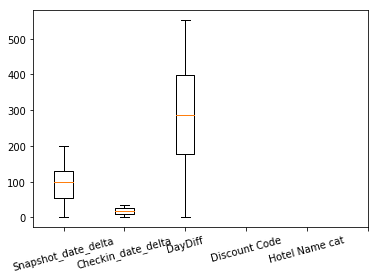

In [12]:
display_data=[data['Checkin_date_delta'],data['DayDiff'],data['Hotel Name cat']]
plt.boxplot(display_data)
plt.xticks(range(1,7),data.columns,rotation=15)
plt.show()

In [13]:
#Split the data into a training and a testing set
from sklearn.tree import DecisionTreeClassifier

train_features = data.iloc[:80,:-1]
test_features = data.iloc[80:,:-1]
train_targets = data.iloc[:80,-1]
test_targets = data.iloc[80:,-1]

In [14]:
"""
Train the model
"""
tree = DecisionTreeClassifier(criterion = 'entropy').fit(train_features,train_targets)

In [15]:
"""
Predict the classes of new, unseen data
"""
prediction = tree.predict(test_features)

In [16]:
"""
Check the accuracy
"""
print("The prediction accuracy is: ",tree.score(test_features,test_targets)*100,"%")

The prediction accuracy is:  1.9976779855992504 %


In [17]:
data

,Snapshot_date_delta,Checkin_date_delta,DayDiff,Discount Code,Hotel Name cat
0,0.0,25.0,26,1,35
1,0.0,32.0,33,1,35
2,0.0,26.0,27,1,482
3,0.0,8.0,9,1,127
4,0.0,25.0,26,1,127
5,0.0,20.0,21,1,163
6,0.0,22.0,23,1,163
7,0.0,25.0,26,1,163
8,0.0,26.0,27,1,163
9,0.0,4.0,5,1,197


In [18]:
X = data[['Snapshot_date_delta','Checkin_date_delta','DayDiff','Hotel Name cat']]
Y = data["Discount Code"]

In [19]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
 
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.4, random_state = 100)


C:\Users\naama.zecharia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [21]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [22]:
#Prediction gini index
clf_gini.predict([[4, 4, 3, 3]])

array([2], dtype=int64)

In [23]:
#Prediction for Decision Tree classifier with criterion as gini index
y_pred = clf_gini.predict(X_test)
y_pred

array([3, 3, 2, ..., 2, 3, 2], dtype=int64)

In [24]:
#Accuracy for Decision Tree classifier with criterion as gini index
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)*100
print("Accuracy is %f" %score)

Accuracy is 32.330317


In [25]:
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array([3, 3, 2, ..., 2, 3, 2], dtype=int64)

In [26]:
score_en = accuracy_score(y_test,y_pred_en)*100
print("Accuracy is %f" %score_en)

Accuracy is 32.322332


In [27]:
regressor = DecisionTreeRegressor(random_state=0)

In [28]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [29]:
pred = regressor.predict(X_test)
score= r2_score(y_test,pred)
print("The predicted r^2 score is %f" %score)

The predicted r^2 score is -0.438658


In [39]:
X = data[['Snapshot_date_delta','Checkin_date_delta','DayDiff','Hotel Name cat']]
Y = data["Discount Code"]

In [40]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
 
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.35, random_state = 0)

In [41]:
dtree = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=7, min_samples_leaf=5)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [42]:
y_predict = dtree.predict(X_test)

accuracy_score(y_test, y_predict)

0.32904923418559023

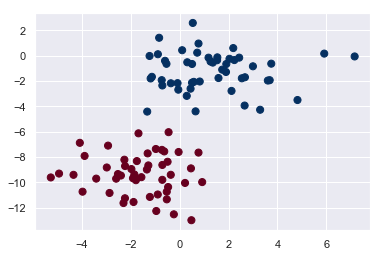

In [34]:
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [35]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [36]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

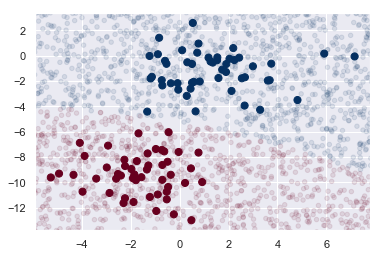

In [37]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [38]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

In [39]:
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
model = GaussianNB()

In [40]:
# Train the model using the training sets 
model.fit(X, y)

GaussianNB(priors=None)

In [41]:
#Predict Output 
predicted= model.predict([[1,2],[3,4]])
print (predicted)


[1 1]


In [42]:
data.head()

,Snapshot_date_delta,Checkin_date_delta,DayDiff,Discount Code,Hotel Name cat
0,0.0,25.0,26,1,35
1,0.0,32.0,33,1,35
2,0.0,26.0,27,1,482
3,0.0,8.0,9,1,127
4,0.0,25.0,26,1,127


In [43]:
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [44]:
# Binarize the output
y = label_binarize(y, classes=[0, 4, 5])
n_classes = y.shape[1]

In [45]:
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]


In [46]:
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,random_state=0)

In [38]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(predictions_test, outcome_test)
roc_auc = auc(fpr, tpr)

NameError: name 'predictions_test' is not defined

In [48]:
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

C:\Users\naama.zecharia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 1 is present in all training examples.
  str(classes[c]))
C:\Users\naama.zecharia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))


In [49]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

C:\Users\naama.zecharia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\ranking.py:571: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\naama.zecharia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\ranking.py:571: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [44]:
DayDiff.head()

,Unnamed: 0,Snapshot Date,Checkin Date,WeekDay,Snapshot_date_delta,Checkin_date_delta
0,0,2015-07-17,2015-08-12,2,0.0,25.0
1,1,2015-07-17,2015-08-19,2,0.0,32.0
2,2,2015-07-17,2015-08-13,3,0.0,26.0
3,3,2015-07-17,2015-07-26,6,0.0,8.0
4,4,2015-07-17,2015-08-12,2,0.0,25.0
